# Melbourne Housing Snapshot
### Data Visualization Overview

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")


In [29]:
# ---------------------------
# 1. Load and Clean the Data
# ---------------------------
path = '/kaggle/input/melbourne-housing-snapshot/melb_data.csv'
df = pd.read_csv(path)

df.dropna(subset=['Price', 'Lattitude', 'Longtitude'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [40]:
df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Cluster
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,NaN
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0.0


In [30]:
# ---------------------------
# 2. Basic Summaries
# ---------------------------
print("Numerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.select_dtypes(include='object').nunique())

Numerical Summary:
               Rooms         Price                           Date  \
count  13580.000000  1.358000e+04                          13580   
mean       2.937997  1.075684e+06  2017-01-28 20:25:03.622974720   
min        1.000000  8.500000e+04            2016-01-28 00:00:00   
25%        2.000000  6.500000e+05            2016-09-10 00:00:00   
50%        3.000000  9.030000e+05            2017-03-04 00:00:00   
75%        3.000000  1.330000e+06            2017-06-24 00:00:00   
max       10.000000  9.000000e+06            2017-09-23 00:00:00   
std        0.955748  6.393107e+05                            NaN   

           Distance      Postcode      Bedroom2      Bathroom           Car  \
count  13580.000000  13580.000000  13580.000000  13580.000000  13518.000000   
mean      10.137776   3105.301915      2.914728      1.534242      1.610075   
min        0.000000   3000.000000      0.000000      0.000000      0.000000   
25%        6.100000   3044.000000      2.000000    

In [31]:
# ---------------------------
# 3. Basic Visualizations
# ---------------------------
fig_hist = px.histogram(df, x='Price', nbins=50, title='Distribution of Property Prices')
fig_hist.show()

# Price vs. Rooms Box Plot using Plotly
fig_box = px.box(df, x='Rooms', y='Price', title='Price Distribution by Number of Rooms')
fig_box.show()

In [32]:
# ---------------------------
# 4. Geospatial Visualization
# ---------------------------
fig_map = px.scatter_mapbox(df,
                            lat='Lattitude', 
                            lon='Longtitude', 
                            color='Price', 
                            size='Price',
                            hover_data=['Address', 'Rooms'],
                            title='Geographic Distribution of Properties with Prices',
                            mapbox_style="carto-positron",
                            zoom=10)
fig_map.show()

In [33]:
# ---------------------------
# 5. Categorical Visualization
# ---------------------------
if 'Type' in df.columns:
    fig_pie = px.pie(df, names='Type', title='Distribution of Property Types')
    fig_pie.show()

In [34]:
# ---------------------------
# 6. Time Series Visualization
# ---------------------------
price_trend = df.groupby('Date')['Price'].mean().reset_index()
fig_line = px.line(price_trend, x='Date', y='Price', title='Average Property Price Over Time')
fig_line.show()

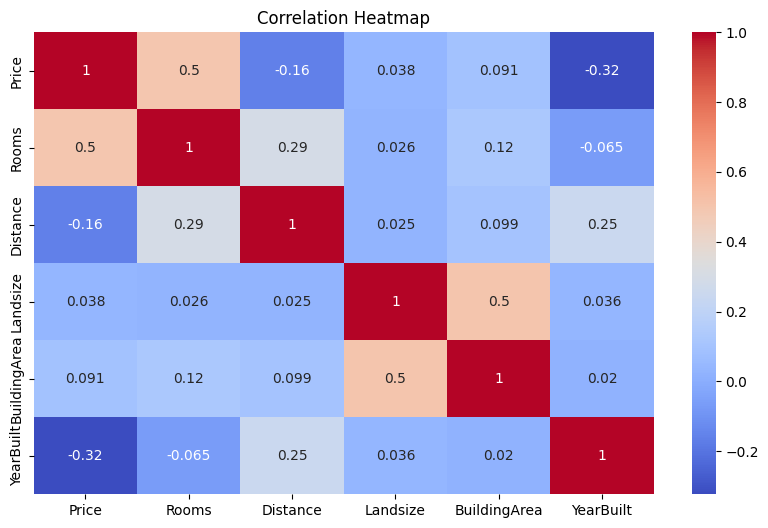

In [35]:
# ---------------------------
# 7. Correlation Heatmap (Seaborn)
# ---------------------------
plt.figure(figsize=(10, 6))
corr = df[['Price', 'Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# ---------------------------
# 8. Multivariate Visualization
# ---------------------------
fig_parallel = px.parallel_coordinates(df, 
                                       dimensions=['Price', 'Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'],
                                       color='Price',
                                       color_continuous_scale=px.colors.sequential.Viridis,
                                       title='Parallel Coordinates Plot of Housing Features')
fig_parallel.show()


In [37]:
# ---------------------------
# 9. Clustering Analysis
# ---------------------------

features = df[['Price', 'Rooms', 'Landsize', 'BuildingArea']].dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df.loc[features.index, 'Cluster'] = clusters

fig_clusters = px.scatter_mapbox(df.loc[features.index],
                                  lat='Lattitude', 
                                  lon='Longtitude', 
                                  color='Cluster',
                                  size='Price', 
                                  hover_data=['Address', 'Price', 'Rooms'],
                                  title='Property Clusters Based on Housing Features',
                                  mapbox_style="carto-positron",
                                  zoom=10)
fig_clusters.show()

Top contributing features for the PCA components:
Component 1: Rooms
Component 2: Distance
Component 3: Landsize


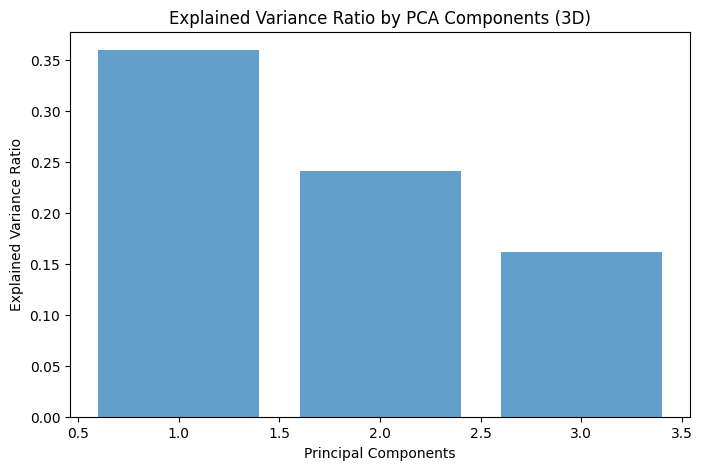

In [39]:
# ---------------------------
# 10. PCA Analysis in 3D with Component Renaming
# ---------------------------
features_for_pca = df[['Price', 'Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']].dropna()

scaler_pca = StandardScaler()
features_scaled_pca = scaler_pca.fit_transform(features_for_pca)

pca3d = PCA(n_components=3)
principalComponents3d = pca3d.fit_transform(features_scaled_pca)

component_names = []
for i in range(3):
    loadings = np.abs(pca3d.components_[i])
    top_idx = np.argmax(loadings)
    top_feature = features_for_pca.columns[top_idx]
    component_names.append(top_feature)

pc3d_df = pd.DataFrame(data=principalComponents3d, columns=['PC1', 'PC2', 'PC3'])

pc3d_df['Price'] = features_for_pca['Price'].values

rename_dict = {'PC1': component_names[0], 'PC2': component_names[1], 'PC3': component_names[2]}
pc3d_df.rename(columns=rename_dict, inplace=True)

print("Top contributing features for the PCA components:")
for i, name in enumerate(component_names, start=1):
    print(f"Component {i}: {name}")

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca3d.explained_variance_ratio_)+1), pca3d.explained_variance_ratio_,
        alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Components (3D)')
plt.show()

fig_pca3d = px.scatter_3d(pc3d_df,
                          x=component_names[0],
                          y=component_names[1],
                          z=component_names[2],
                          color='Price',
                          title=f'3D PCA Analysis: {component_names[0]} vs {component_names[1]} vs {component_names[2]} colored by Price',
                          color_continuous_scale=px.colors.sequential.Viridis)
fig_pca3d.show()
